### **ASSIGNMENT QUESTIONS**

1. Which country do most athlete come from? Is it also the most successful country?

2. What is the age range of CrossFit competitors? At what age do they show peak performance?

3. How many points were scored by each player? Which athlete scored the highest and the lowest points?

4. How many workouts do the overall winner typically did?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#pd.set_option("display.max_rows",None)

CrossFit_men_athlete= pd.read_excel("./CrossFit Games Data/CrossFit_Games_Athletes_Men_2019.xlsx")
CrossFit_women_athlete= pd.read_excel("./CrossFit Games Data/CrossFit_Games_Athletes_Women_2019.xlsx")
CrossFit_games_scores= pd.read_excel("./CrossFit Games Data/CrossFit_Games_Scores_2019.xlsx")
CrossFit_women_athlete
CrossFit_games_scores
#CrossFit_men_athlete

,ordinal,breakdown,lane,rank,heat,points,scoredisplay,time,workoutrank,competitorid,Number of Records
0,1,100 pts,26,1,3,100,00:15:07.700000,00:15:07.700000,1,153604,1
1,2,100 pts,20,1,2,100,00:05:37.020000,00:05:37.020000,1,153604,1
2,3,68 pts,25,17,1,68,00:25:50.090000,00:25:50.090000,17,153604,1
3,4,40 pts,10,21,2,40,00:01:50.080000,00:01:50.080000,21,153604,1
4,5,96 pts,8,2,2,96,675 rep,675,2,153604,1
...,...,...,...,...,...,...,...,...,...,...,...
4208,3,20 pts,6,9,1,20,CAP+6,CAP+6,9,62910,1
4209,4,10 pts,6,10,1,10,CAP+142,CAP+142,10,62910,1
4210,5,NaN,3,WD,1,0,NaN,NaN,WD,62910,1
4211,6,NaN,3,WD,1,0,NaN,NaN,WD,62910,1


#### **WHICH COUNTRY DO MOST ATHLETE COME FROM? IS IT ALSO THE MOST SUCCESSFUL COUNTRY (IN THE MEN ATHLETE)?**

In [2]:
athletic_country= CrossFit_men_athlete["countryoforiginname"].value_counts().reset_index(name="Total No of Athletes per Country")

athletic_country

,countryoforiginname,Total No of Athletes per Country
0,United States,68
1,Canada,11
2,Australia,5
3,Iceland,4
4,Sweden,3
...,...,...
102,Sri Lanka,1
103,Andorra,1
104,Papua New Guinea,1
105,Viet Nam,1


In [3]:
most_athletic_country= athletic_country.nlargest(1, "Total No of Athletes per Country")

most_athletic_country

,countryoforiginname,Total No of Athletes per Country
0,United States,68


In [4]:
most_athletic_country =  athletic_country.loc[athletic_country['Total No of Athletes per Country'].idxmax()]

print(f"The country with the highest number of athlete is {most_athletic_country["countryoforiginname"]} with {most_athletic_country["Total No of Athletes per Country"]} athletes")

The country with the highest number of athlete is United States with 68 athletes


#### **IS IT ALSO THE MOST SUCCESSFUL COUNTRY?**

In [5]:
successful_country= CrossFit_men_athlete.groupby("countryoforiginname")["overallscore"].sum().reset_index(name="Performance based on overall score per country")

successful_country

,countryoforiginname,Performance based on overall score per country
0,Afghanistan,-58.0
1,Algeria,-47.0
2,Andorra,-63.0
3,Angola,-22.0
4,Argentina,66.0
...,...,...
102,United States,25402.0
103,Uruguay,-18.0
104,Venezuela,24.0
105,Viet Nam,-63.0


In [6]:
most_successful_country =  successful_country.loc[successful_country['Performance based on overall score per country'].idxmax()]

print(f"The most successful country is {most_successful_country["countryoforiginname"]} and their overall score is {most_successful_country["Performance based on overall score per country"]}")

The most successful country is United States and their overall score is 25402.0


### **WHAT IS THE AGE RANGE OF CROSSFIT COMPETITORS? AT WHAT AGE DO THEY SHOW PEAK PERFORMANCE (IN THE WOMEN ATHLETE)?**

In [7]:
age_range= CrossFit_women_athlete.groupby("competitorname")["age"].sum().reset_index()

age_range

,competitorname,age
0,Aida Koepplinger,45
1,Akiko Kamitani,30
2,Alaa Hannora,32
3,Alessandra Pichelli,33
4,Alessia Joy WÃ¤lchli,25
...,...,...
186,Vanessa Wagner,28
187,Vera Valdez,30
188,Victoria Frascolla,28
189,Vilija Teel,43


In [8]:
min_age_range= age_range["age"].idxmin()

min_age_range

19

In [9]:
max_age_range= age_range["age"].idxmax()

max_age_range

30

In [10]:
print(f"The age range of CrossFit competitors ia between {min_age_range}years and {max_age_range}years")

The age range of CrossFit competitors ia between 19years and 30years


#### **AT WHAT AGE DO THEY SHOW PEAK PERFORMANCE?**

In [11]:
peak_performance_by_age= CrossFit_women_athlete.groupby("age")["overallscore"].sum().reset_index()

peak_performance_by_age

,age,overallscore
0,17,-17
1,18,711
2,19,-17
3,20,-19
4,21,-51
5,22,558
6,23,492
7,24,1010
8,25,2112
9,26,1242


#### **HOW MANY POINTS WERE SCORED BY EACH ATHLETE? WHICH ATHLETE SCORED THE HIGHEST AND THE LOWEST POINTS (IN THE WOMEN ATHLETE)?**

In [12]:
merged_sheets = pd.merge(CrossFit_women_athlete,CrossFit_games_scores, on="competitorid", how="inner")

merged_sheets

,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,...,ordinal,breakdown,lane,rank,heat,points,scoredisplay,time,workoutrank,Number of Records_y
0,1.65,44632.0,Australia,58.1,CrossFit Mayhem,ACT,17,b8a69-P163097_3-184.jpg,163097,Tia-Clair,...,1,100 pts,23,1,3,100,00:16:56.630000,00:16:56.630000,1,1
1,1.65,44632.0,Australia,58.1,CrossFit Mayhem,ACT,17,b8a69-P163097_3-184.jpg,163097,Tia-Clair,...,2,78 pts,20,12,2,78,00:06:59.750000,00:06:59.750000,12,1
2,1.65,44632.0,Australia,58.1,CrossFit Mayhem,ACT,17,b8a69-P163097_3-184.jpg,163097,Tia-Clair,...,3,98 pts,24,2,1,98,00:27:11.180000,00:27:11.180000,2,1
3,1.65,44632.0,Australia,58.1,CrossFit Mayhem,ACT,17,b8a69-P163097_3-184.jpg,163097,Tia-Clair,...,4,67 pts,10,12,2,67,00:01:47.660000,00:01:47.660000,12,1
4,1.65,44632.0,Australia,58.1,CrossFit Mayhem,ACT,17,b8a69-P163097_3-184.jpg,163097,Tia-Clair,...,5,88 pts,8,4,2,88,656 rep,656,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,1.68,44907.0,Canada,55.8,CrossFit Lions,WD,609,d55e0-P62910_4-184.jpg,62910,Debby,...,3,20 pts,6,9,1,20,CAP+6,CAP+6,9,1
2028,1.68,44907.0,Canada,55.8,CrossFit Lions,WD,609,d55e0-P62910_4-184.jpg,62910,Debby,...,4,10 pts,6,10,1,10,CAP+142,CAP+142,10,1
2029,1.68,44907.0,Canada,55.8,CrossFit Lions,WD,609,d55e0-P62910_4-184.jpg,62910,Debby,...,5,NaN,3,WD,1,0,NaN,NaN,WD,1
2030,1.68,44907.0,Canada,55.8,CrossFit Lions,WD,609,d55e0-P62910_4-184.jpg,62910,Debby,...,6,NaN,3,WD,1,0,NaN,NaN,WD,1


In [13]:
number_of_points_by_each_athlete = merged_sheets.groupby("competitorname")["points"].sum().reset_index(name="Number of points by each athlete")

print(number_of_points_by_each_athlete)

           competitorname  Number of points by each athlete
0        Aida Koepplinger                               350
1          Akiko Kamitani                                26
2            Alaa Hannora                               -27
3     Alessandra Pichelli                               365
4    Alessia Joy WÃ¤lchli                               152
..                    ...                               ...
186        Vanessa Wagner                                18
187           Vera Valdez                                21
188    Victoria Frascolla                               -27
189           Vilija Teel                               -27
190           Zaida Amade                               -42

[191 rows x 2 columns]


#### **ATHLETE WITH THE HIGHEST AND LOWEST POINTS**

In [14]:
athlete_with_highest_points= number_of_points_by_each_athlete.loc[number_of_points_by_each_athlete["Number of points by each athlete"].idxmax()]

print(f" The athlete with the highest number of point is {athlete_with_highest_points["competitorname"]} with {athlete_with_highest_points["Number of points by each athlete"]} points")

 The athlete with the highest number of point is Tia-Clair Toomey with 1071 points


In [15]:
athlete_with_highest_points= number_of_points_by_each_athlete.nlargest(1, "Number of points by each athlete")

athlete_with_highest_points

,competitorname,Number of points by each athlete
181,Tia-Clair Toomey,1071


In [16]:
athlete_with_lowest_points= number_of_points_by_each_athlete.loc[number_of_points_by_each_athlete["Number of points by each athlete"].idxmin()]

print(f" The athlete with the lowest number of point is {athlete_with_lowest_points["competitorname"]} with {athlete_with_lowest_points["Number of points by each athlete"]} points")

 The athlete with the lowest number of point is Amal Alshahrani with -42 points


#### **HOW MANY WORKOUTS DO THE OVERALL WINNER DID (IN THE MEN ATHLETE)?**

In [17]:
overall_winner= merged_sheets.groupby("competitorname")["overallscore"].sum().reset_index()

overall_winner

,competitorname,overallscore
0,Aida Koepplinger,2800
1,Akiko Kamitani,312
2,Alaa Hannora,-324
3,Alessandra Pichelli,4380
4,Alessia Joy WÃ¤lchli,1824
...,...,...
186,Vanessa Wagner,216
187,Vera Valdez,252
188,Victoria Frascolla,-324
189,Vilija Teel,-324


In [18]:
overall_winner= overall_winner.sort_values(by="overallscore", ascending= False).head(1)

overall_winner

,competitorname,overallscore
181,Tia-Clair Toomey,12852


In [19]:
merged_sheets= pd.merge(CrossFit_men_athlete, CrossFit_games_scores, on="competitorid", how="inner")

merged_sheets

,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,...,ordinal,breakdown,lane,rank,heat,points,scoredisplay,time,workoutrank,Number of Records_y
0,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,1,100 pts,26,1,3,100,00:15:07.700000,00:15:07.700000,1,1
1,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,2,100 pts,20,1,2,100,00:05:37.020000,00:05:37.020000,1,1
2,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,3,68 pts,25,17,1,68,00:25:50.090000,00:25:50.090000,17,1
3,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,4,40 pts,10,21,2,40,00:01:50.080000,00:01:50.080000,21,1
4,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,5,96 pts,8,2,2,96,675 rep,675,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,3,30 pts,11,8,1,30,00:04:55.240000,00:04:55.240000,8,1
2177,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,4,10 pts,11,10,1,10,CAP+31,CAP+31,10,1
2178,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,5,10 pts,20,10,1,10,140.0 lb,140,10,1
2179,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,6,10 pts,20,10,1,10,CAP+36,CAP+36,10,1


In [20]:
merged_sheets['workoutrank'] = merged_sheets['workoutrank'].astype("string")

merged_sheets


,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,...,ordinal,breakdown,lane,rank,heat,points,scoredisplay,time,workoutrank,Number of Records_y
0,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,1,100 pts,26,1,3,100,00:15:07.700000,00:15:07.700000,1,1
1,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,2,100 pts,20,1,2,100,00:05:37.020000,00:05:37.020000,1,1
2,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,3,68 pts,25,17,1,68,00:25:50.090000,00:25:50.090000,17,1
3,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,4,40 pts,10,21,2,40,00:01:50.080000,00:01:50.080000,21,1
4,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,5,96 pts,8,2,2,96,675 rep,675,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,3,30 pts,11,8,1,30,00:04:55.240000,00:04:55.240000,8,1
2177,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,4,10 pts,11,10,1,10,CAP+31,CAP+31,10,1
2178,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,5,10 pts,20,10,1,10,140.0 lb,140,10,1
2179,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,6,10 pts,20,10,1,10,CAP+36,CAP+36,10,1


In [21]:
#2. Using pd.to_numeric()

#- Best for; Columns with possible non-numeric or missing values.
#- errors='coerce' will convert invalid parsing to NaN, allowing the conversion to proceed without errors
merged_sheets['workoutrank'] = pd.to_numeric(merged_sheets['workoutrank'], errors='coerce')

merged_sheets


,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,...,ordinal,breakdown,lane,rank,heat,points,scoredisplay,time,workoutrank,Number of Records_y
0,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,1,100 pts,26,1,3,100,00:15:07.700000,00:15:07.700000,1,1
1,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,2,100 pts,20,1,2,100,00:05:37.020000,00:05:37.020000,1,1
2,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,3,68 pts,25,17,1,68,00:25:50.090000,00:25:50.090000,17,1
3,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,4,40 pts,10,21,2,40,00:01:50.080000,00:01:50.080000,21,1
4,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,5,96 pts,8,2,2,96,675 rep,675,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,3,30 pts,11,8,1,30,00:04:55.240000,00:04:55.240000,8,1
2177,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,4,10 pts,11,10,1,10,CAP+31,CAP+31,10,1
2178,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,5,10 pts,20,10,1,10,140.0 lb,140,10,1
2179,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,6,10 pts,20,10,1,10,CAP+36,CAP+36,10,1


In [22]:
no_of_workouts= merged_sheets.groupby("competitorname")["workoutrank"].sum().reset_index(name="No of workouts")

no_of_workouts

,competitorname,No of workouts
0,Achilleas Pantazis,126
1,Adrian Mundwiler,115
2,Agustin Richelme,136
3,Alban Dubois,101
4,Aleks KoÅ¡tomaj,121
...,...,...
198,William Sanchez,119
199,Willy Georges,123
200,Yuval Regev,121
201,Zachery Buntin,90


In [23]:
athlete_with_highest_workouts= no_of_workouts.sort_values(by="No of workouts", ascending=False).head(1)

athlete_with_highest_workouts

,competitorname,No of workouts
196,Will Moorad,158


In [24]:
athlete_with_highest_workouts = no_of_workouts.nlargest(1, "No of workouts")

athlete_with_highest_workouts

,competitorname,No of workouts
196,Will Moorad,158


In [25]:
merged_sheets.columns.to_list()

['height',
 'affiliateid',
 'countryoforiginname',
 'weight',
 'affiliatename',
 'status',
 'bibid',
 'profilepics3key',
 'competitorid',
 'firstname',
 'gender',
 'age',
 'lastname',
 'countryoforigincode',
 'competitorname',
 'overallrank',
 'overallscore',
 'division',
 'Number of Records_x',
 'ordinal',
 'breakdown',
 'lane',
 'rank',
 'heat',
 'points',
 'scoredisplay',
 'time',
 'workoutrank',
 'Number of Records_y']

In [26]:
# this is the code used to remove/delete character/texts from a column
#pd.set_option("display.max_columns",None)
CrossFit_games = merged_sheets[(merged_sheets["workoutrank"] !="WD") & (merged_sheets["workoutrank"] !="CUT") ]

CrossFit_games

,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,...,ordinal,breakdown,lane,rank,heat,points,scoredisplay,time,workoutrank,Number of Records_y
0,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,1,100 pts,26,1,3,100,00:15:07.700000,00:15:07.700000,1,1
1,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,2,100 pts,20,1,2,100,00:05:37.020000,00:05:37.020000,1,1
2,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,3,68 pts,25,17,1,68,00:25:50.090000,00:25:50.090000,17,1
3,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,4,40 pts,10,21,2,40,00:01:50.080000,00:01:50.080000,21,1
4,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,16,9e218-P153604_4-184.jpg,153604,Mathew,...,5,96 pts,8,2,2,96,675 rep,675,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,3,30 pts,11,8,1,30,00:04:55.240000,00:04:55.240000,8,1
2177,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,4,10 pts,11,10,1,10,CAP+31,CAP+31,10,1
2178,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,5,10 pts,20,10,1,10,140.0 lb,140,10,1
2179,1.77,44815.0,United States,74.8,CrossFit Dallas Central,ACT,609,965f4-P522158_1-184.jpg,522158,Tom,...,6,10 pts,20,10,1,10,CAP+36,CAP+36,10,1


In [27]:
no_of_workouts = CrossFit_games.groupby("competitorname")["workoutrank"].sum().reset_index(name="No of workout")

no_of_workouts

,competitorname,No of workout
0,Achilleas Pantazis,126
1,Adrian Mundwiler,115
2,Agustin Richelme,136
3,Alban Dubois,101
4,Aleks KoÅ¡tomaj,121
...,...,...
186,William Sanchez,119
187,Willy Georges,123
188,Yuval Regev,121
189,Zachery Buntin,90


In [28]:
athlete_with_highest_workouts = no_of_workouts.sort_values(by="No of workout", ascending=False).head(1)

athlete_with_highest_workouts

,competitorname,No of workout
184,Will Moorad,158


In [29]:
data_new1 = CrossFit_games.copy()

data_new1.dtypes



height                 float64
affiliateid            float64
countryoforiginname     object
weight                 float64
affiliatename           object
status                  object
bibid                    int64
profilepics3key         object
competitorid             int64
firstname               object
gender                  object
age                      int64
lastname                object
countryoforigincode     object
competitorname          object
overallrank             object
overallscore           float64
division                object
Number of Records_x      int64
ordinal                  int64
breakdown               object
lane                     int64
rank                    object
heat                     int64
points                   int64
scoredisplay            object
time                    object
workoutrank              Int64
Number of Records_y      int64
dtype: object

## **MINI DASHBOARD**

C:\Users\USER\AppData\Local\Temp\ipykernel_11600\1950916085.py:43: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


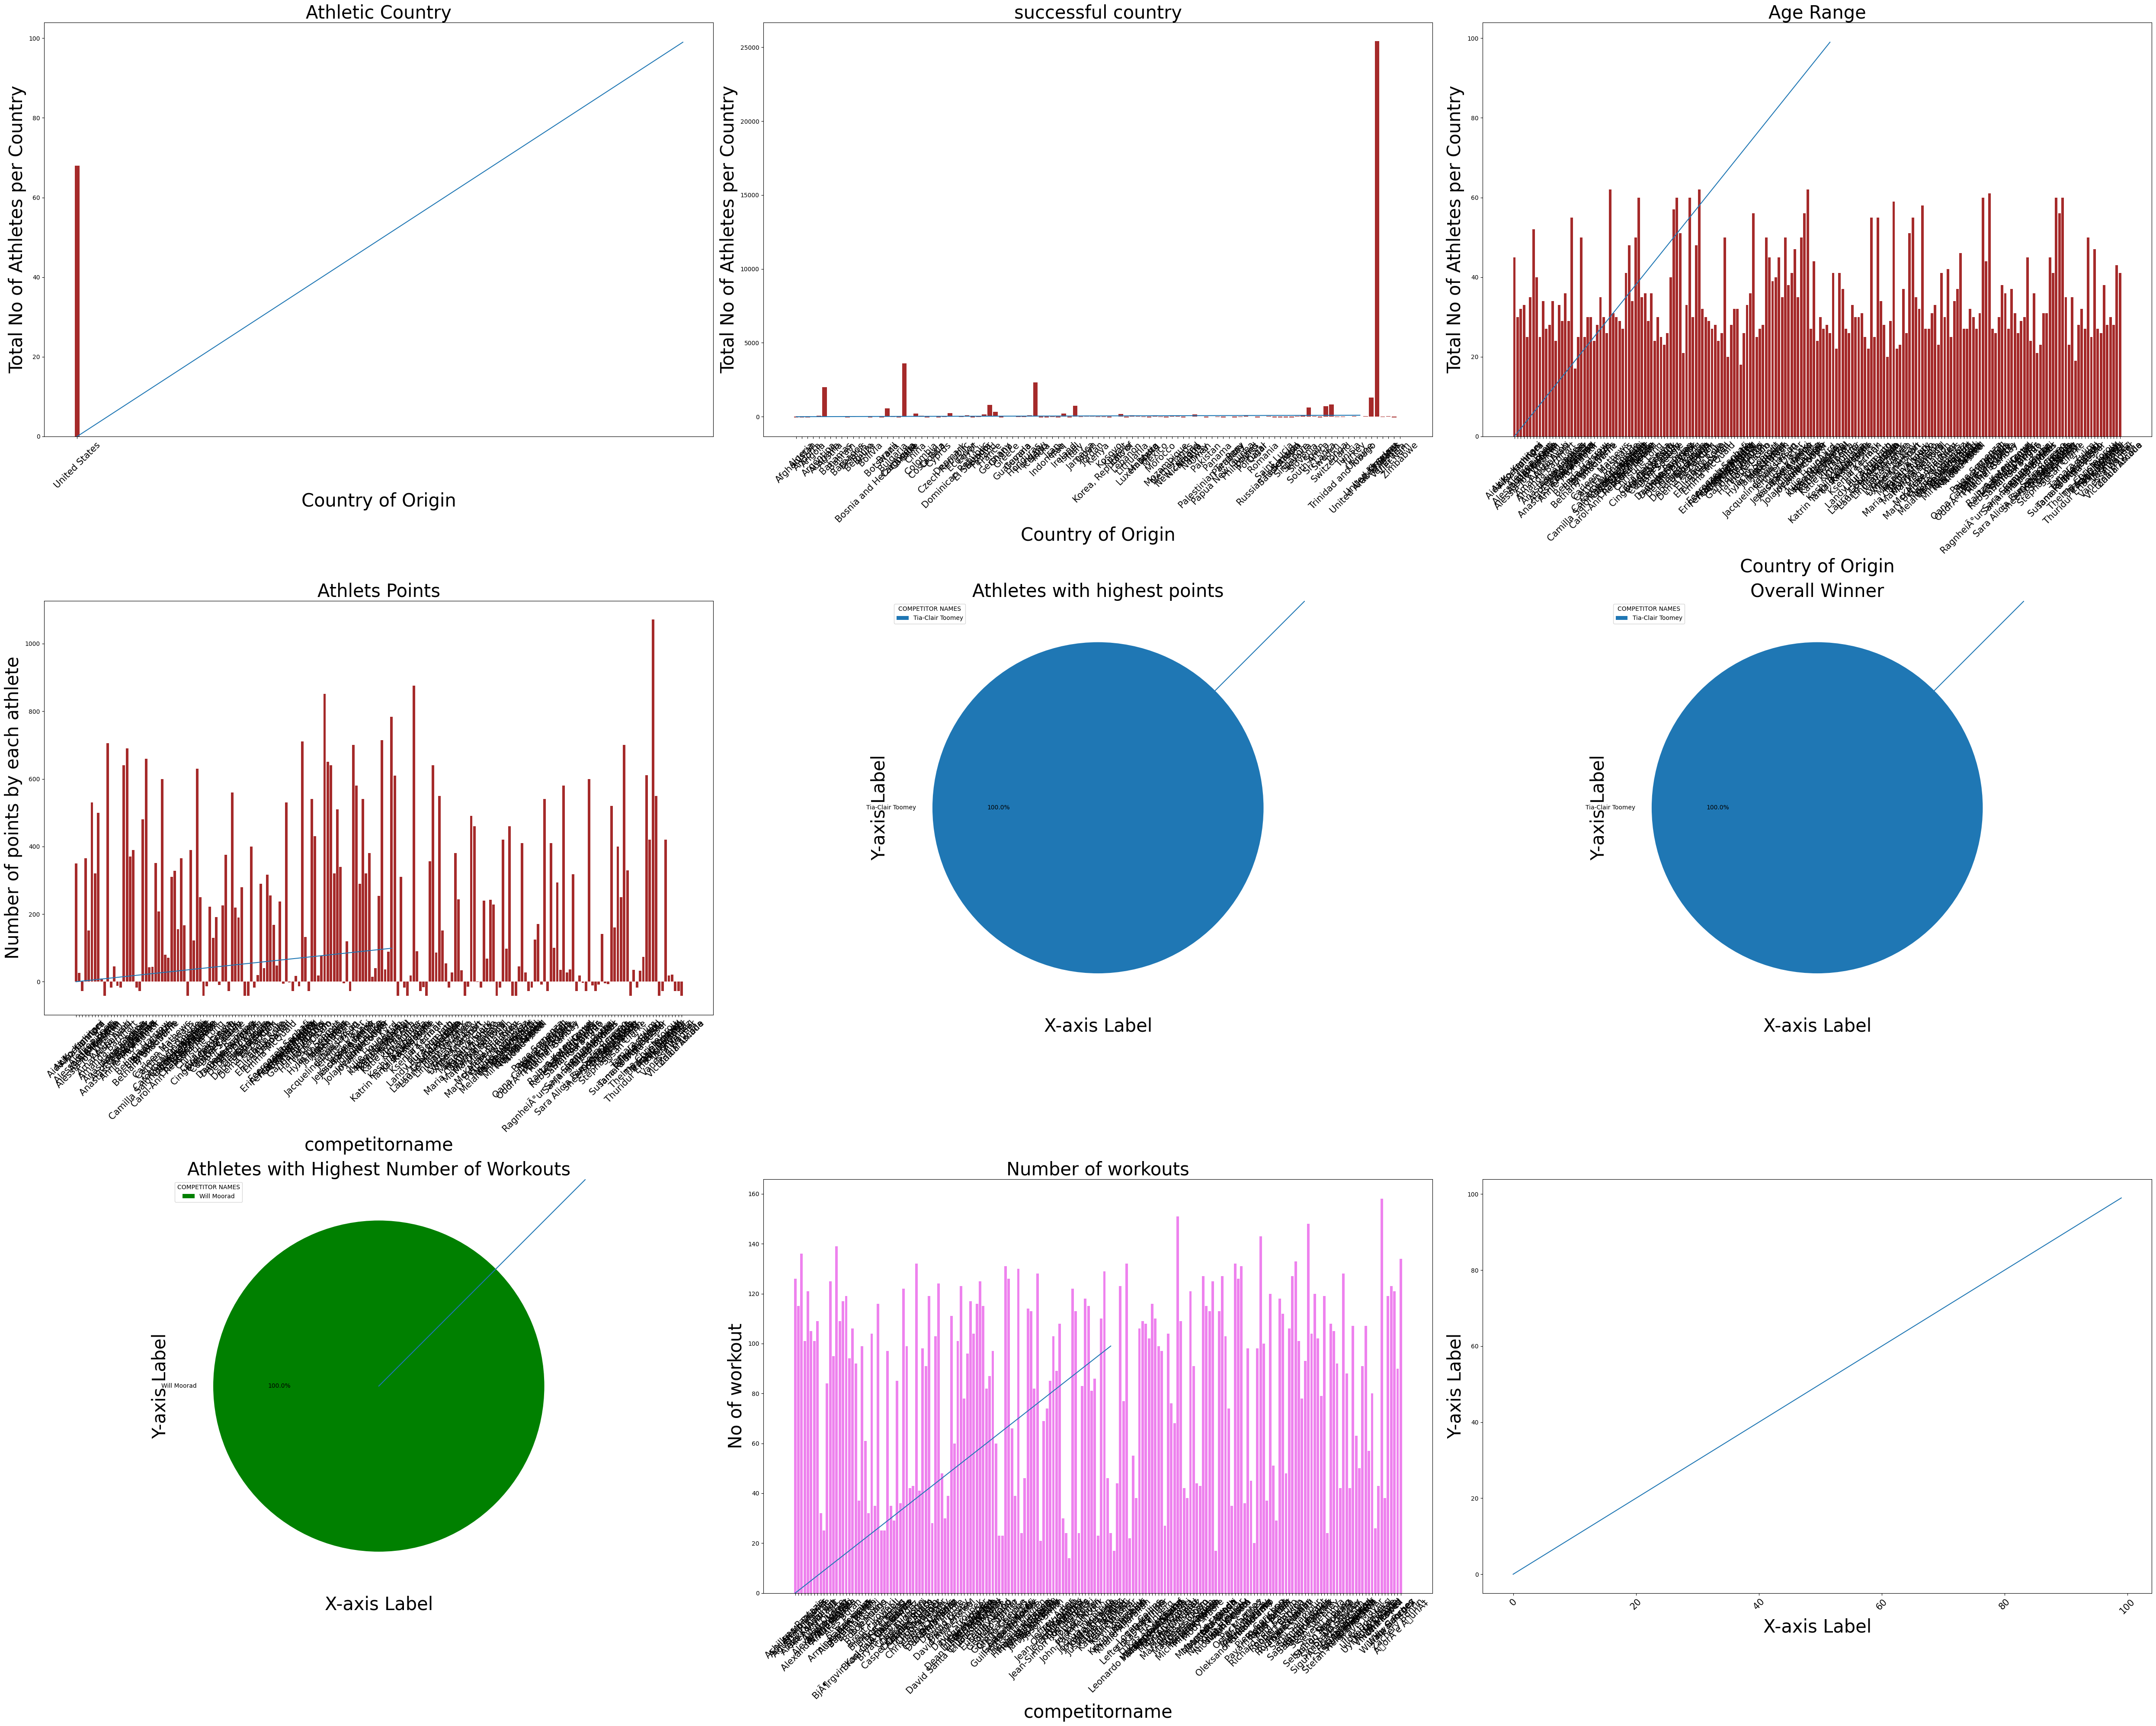

In [30]:
fig, axs = plt.subplots(3,3, figsize=(50,40))
for ax in axs.flatten():
    ax.plot(range(100))  # large dataset example
    ax.tick_params(axis='x', rotation=45, labelsize=15)  # rotate for readability
    ax.set_xlabel('X-axis Label', fontsize=30)  # font size 20 for x-axis label
    ax.set_ylabel('Y-axis Label', fontsize=30)  # font size 20 for y-axis label
axs[0,0].bar(most_athletic_country["countryoforiginname"], most_athletic_country["Total No of Athletes per Country"], color="brown")
axs[0,0].set_title('Athletic Country',fontsize=30)
axs[0,0].set_xlabel('Country of Origin')
axs[0,0].set_ylabel('Total No of Athletes per Country')
axs[0,1].bar(successful_country["countryoforiginname"], successful_country["Performance based on overall score per country"], color="brown")
axs[0,1].set_title('successful country',fontsize=30)
axs[0,1].set_xlabel('Country of Origin')
axs[0,1].set_ylabel('Total No of Athletes per Country')
axs[0,2].bar(age_range["competitorname"], age_range["age"], color="brown")
axs[0,2].set_title('Age Range',fontsize=30)
axs[0,2].set_xlabel('Country of Origin')
axs[0,2].set_ylabel('Total No of Athletes per Country')
axs[1,0].bar(number_of_points_by_each_athlete["competitorname"], number_of_points_by_each_athlete["Number of points by each athlete"], color="brown")
axs[1,0].set_title('Athlets Points',fontsize=30)
axs[1,0].set_xlabel('competitorname')
axs[1,0].set_ylabel('Number of points by each athlete')
axs[1,1].pie(athlete_with_highest_points["Number of points by each athlete"], labels=athlete_with_highest_points["competitorname"],autopct="%1.1f%%")
axs[1,1].set_title('Athletes with highest points',fontsize=30)
axs[1,1].legend(title="COMPETITOR NAMES", fontsize=50)
axs[1,1].legend(title='COMPETITOR NAMES', title_fontsize=10)
axs[1,2].pie(overall_winner["overallscore"], labels=overall_winner["competitorname"],autopct="%1.1f%%")
axs[1,2].set_title('Overall Winner',fontsize=30)
axs[1,2].legend(title="COMPETITOR NAMES", fontsize=50)
axs[1,2].legend(title='COMPETITOR NAMES', title_fontsize=10)
axs[2,0].pie(
athlete_with_highest_workouts["No of workout"], labels=
athlete_with_highest_workouts["competitorname"],autopct="%1.1f%%", colors="grey")
axs[2,0].set_title('Athletes with Highest Number of Workouts',fontsize=30)
axs[2,0].legend(title="COMPETITOR NAMES", fontsize=50)
axs[2,0].legend(title='COMPETITOR NAMES', title_fontsize=10)
axs[2,1].bar(no_of_workouts["competitorname"], no_of_workouts["No of workout"], color="violet")
axs[2,1].set_title('Number of workouts',fontsize=30)
axs[2,1].set_xlabel('competitorname')
axs[2,1].set_ylabel('No of workout')


plt.tight_layout()
plt.show()

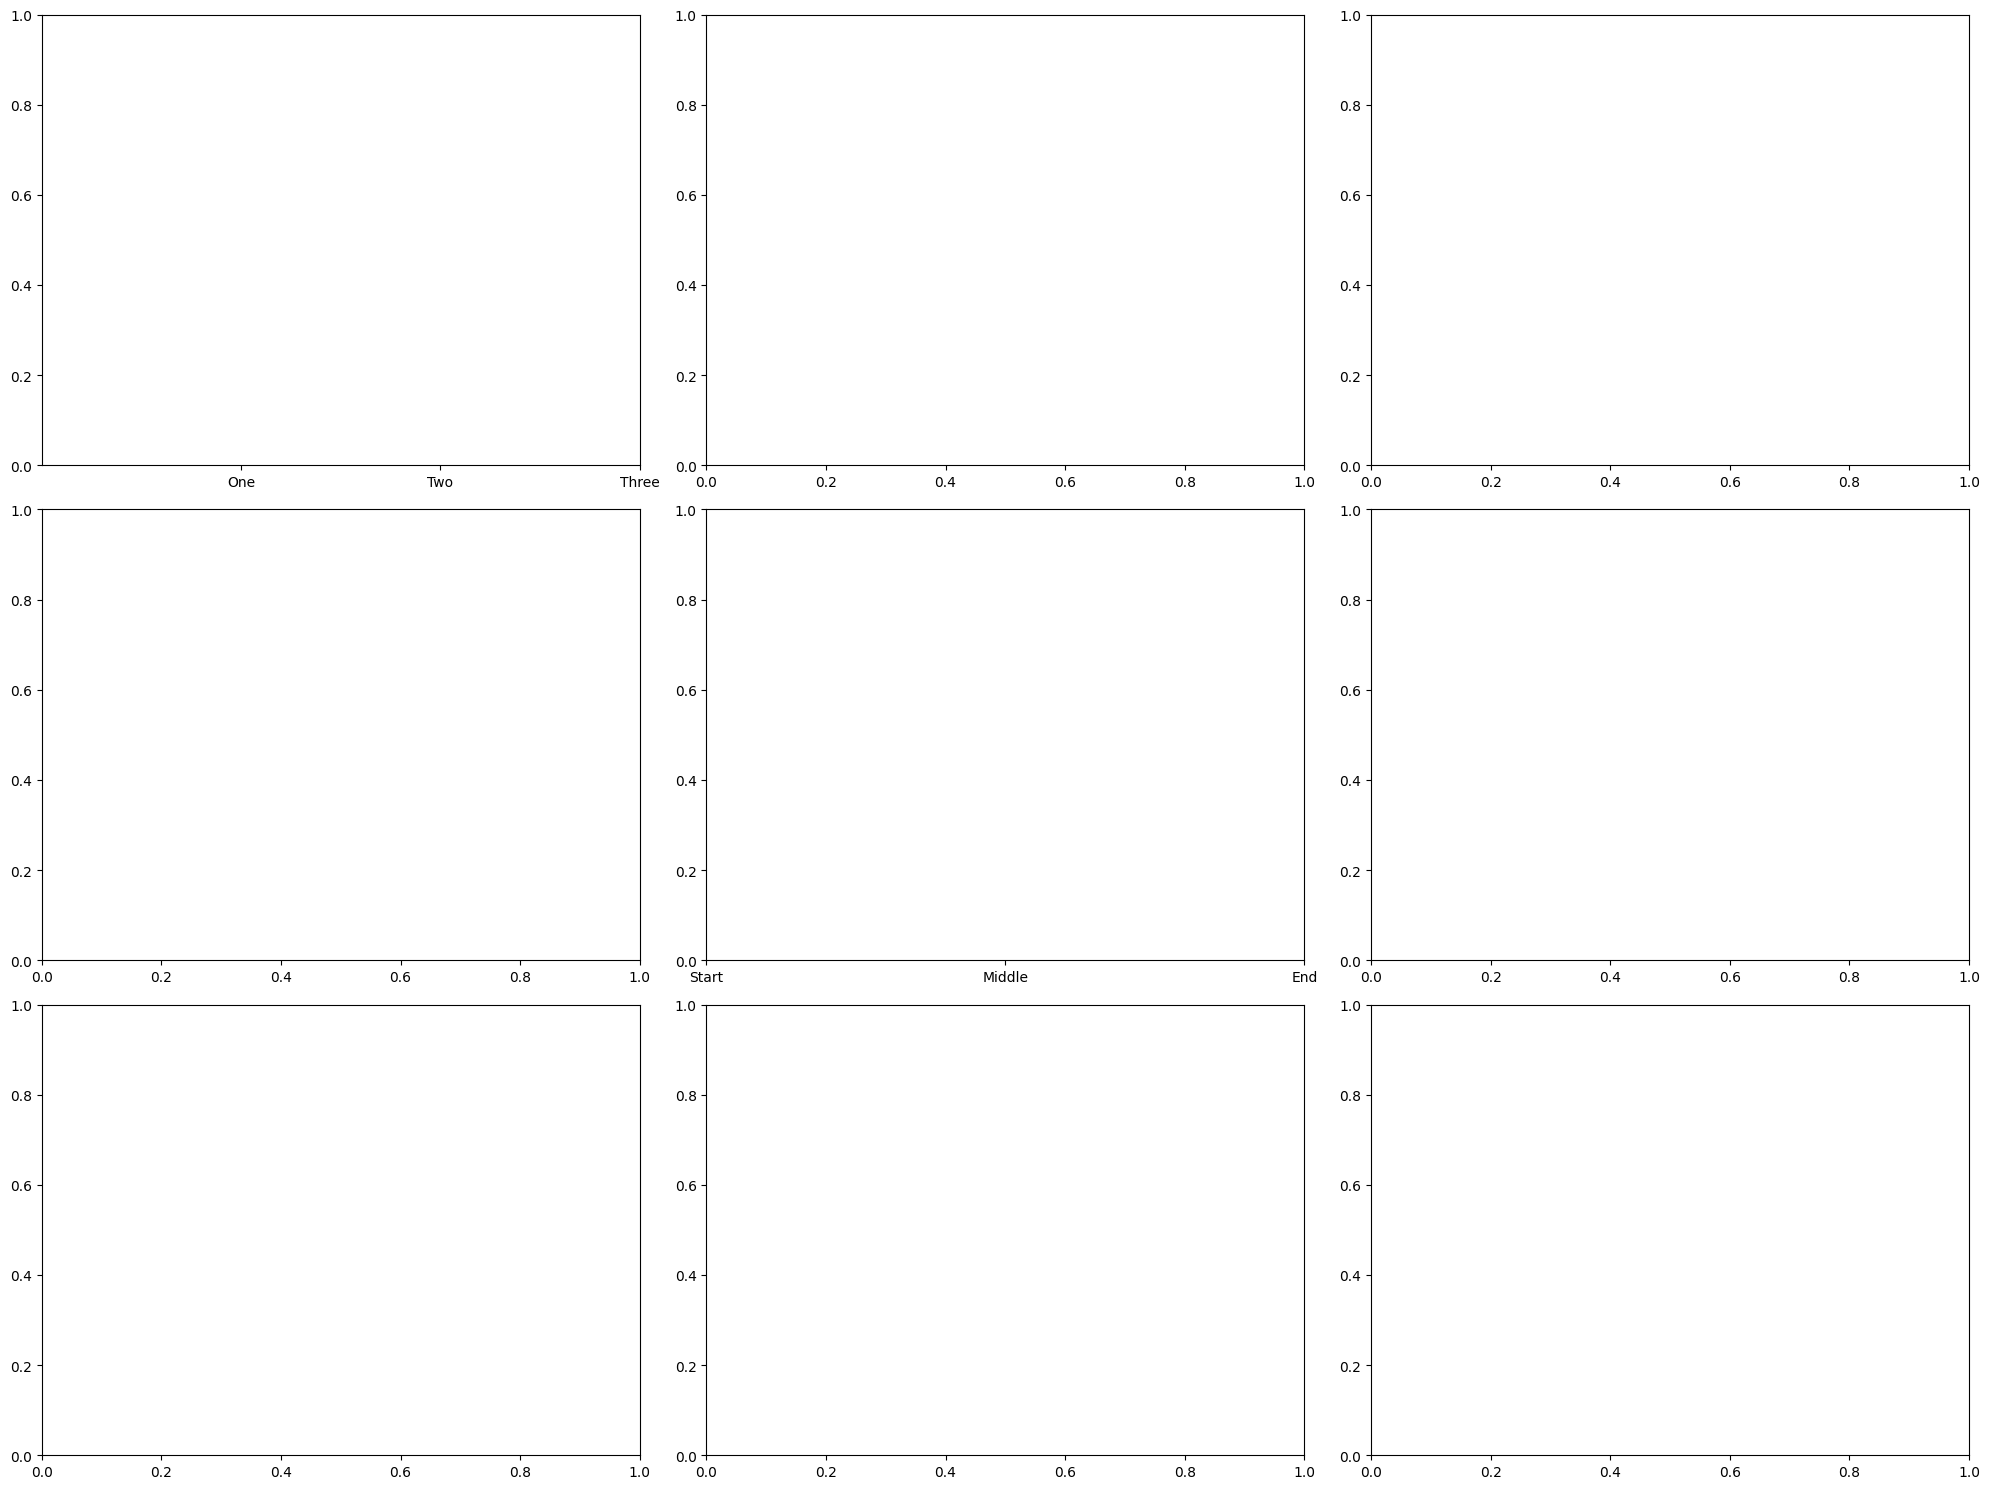

In [31]:
fig, axs = plt.subplots(3,3, figsize=(20,15))
# Set xticks and labels for the subplot at position (0, 0)
axs[0, 0].set_xticks([1, 2, 3])
axs[0, 0].set_xticklabels(['One', 'Two', 'Three'])

# Set xticks and labels for the subplot at position (1, 1)
axs[1, 1].set_xticks([0, 5, 10])
axs[1, 1].set_xticklabels(['Start', 'Middle', 'End'])
plt.tight_layout()
plt.show()
